In [ ]:
!pip -q install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Confusión Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/FundamentosCienciaDatos/books_clean_for_eda.csv')
df.head()

,title,description,availability,rating,description_length,price,sentiment_label,categoria_agrupada
0,its only the himalayas,wherever you go whatever you do just dont d...,19,2,224.0,45.17,positive,Lifestyle & Personal Development
1,full moon over noahs ark an odyssey to mount a...,acclaimed travel writer rick antonson sets his...,15,4,284.0,49.43,positive,Lifestyle & Personal Development
2,see america a celebration of our national park...,to coincide with the 2016 centennial anniversa...,14,3,145.0,48.87,positive,Lifestyle & Personal Development
3,vagabonding an uncommon guide to the art of lo...,with a new foreword by tim ferriss theres noth...,8,2,316.0,36.94,positive,Lifestyle & Personal Development
4,under the tuscan sun,a classic from the bestselling author of under...,7,3,166.0,37.33,positive,Lifestyle & Personal Development


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1000 non-null   object 
 1   description         998 non-null    object 
 2   availability        1000 non-null   int64  
 3   rating              1000 non-null   int64  
 4   description_length  1000 non-null   float64
 5   price               1000 non-null   float64
 6   sentiment_label     1000 non-null   object 
 7   categoria_agrupada  1000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


Aunque hay 2 registros con descripción nula no importa ya que su descripición fue eliminada y se le asignó una longitud mínima

<Axes: xlabel='categoria_agrupada', ylabel='count'>

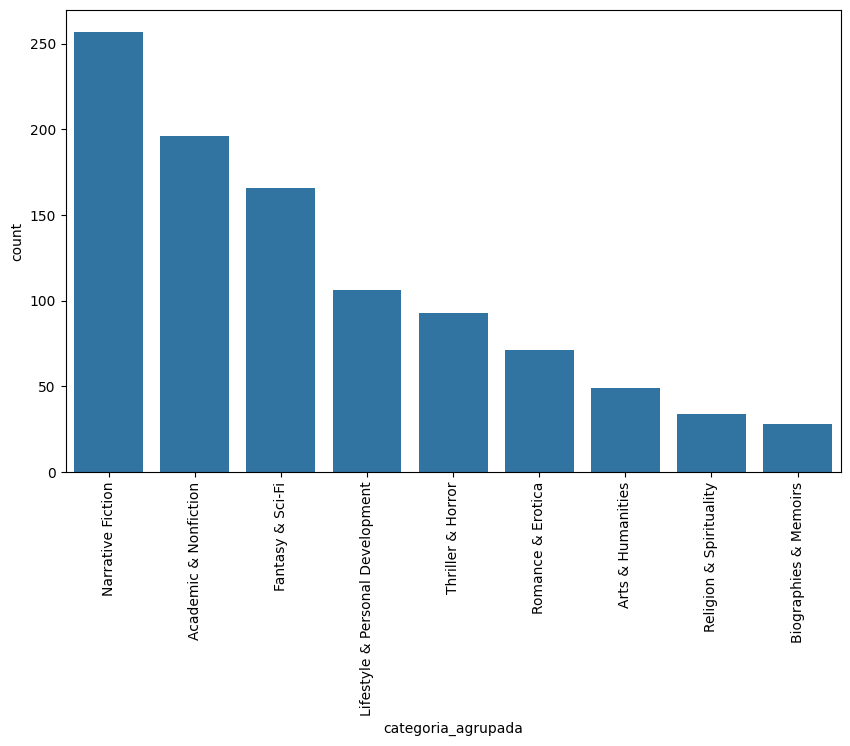

In [ ]:
df_category_counts = pd.DataFrame(df["categoria_agrupada"].value_counts())
df_category_counts = df_category_counts.sort_values(by = "count", ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

## Convertimos el rating en categorica

In [ ]:
df["rating"] = df["rating"].astype("str")

## Nos deshacemos del título y la descripción

In [ ]:
df = df.drop(columns=["title","description"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   availability        1000 non-null   int64  
 1   rating              1000 non-null   object 
 2   description_length  1000 non-null   float64
 3   price               1000 non-null   float64
 4   sentiment_label     1000 non-null   object 
 5   categoria_agrupada  1000 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


## Regresión para predecir precio

In [ ]:
numerical_features = df.drop("price",axis=1).select_dtypes(include=["int64","float64"]).columns

In [ ]:
numerical_transformer = StandardScaler()

In [ ]:
categorical_features = df.select_dtypes(include=["object"]).columns

In [ ]:
categorical_transformer = OneHotEncoder(drop="first")

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

In [ ]:
X = df.drop(columns=["price"])
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo Lineal

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label', 'categoria_agrupada'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def metricas_regresion(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R^2:", r2)

In [ ]:
metricas_regresion(y_test, y_pred)

Mean Squared Error: 196.40513664974097
Root Mean Squared Error: 14.014461696752429
R^2: -0.04017512655529765


In [ ]:
min_price = df["price"].min()
max_price = df["price"].max()
print("Precio mínimo:", min_price)
print("Precio máximo:", max_price)

Precio mínimo: 10.0
Precio máximo: 59.99


El RMSE es de 14.01 dólares y cómo el rango de precios de los libros va de entre los \$10 a \$60, es un error notable. Eso quiere decir que del valor real se puede alejar -\$14.01 a $14.01.
Además la R^2 dio igual a 0, lo cual significa que para nada los datos se ajustan a un modelo lineal.

In [ ]:
def ecuacion_modelo(pipeline,feature_names):
    preprocessor = pipeline.named_steps["preprocessor"]
    regresor = pipeline.named_steps["regressor"]

    coef = regresor.coef_
    intercept = regresor.intercept_

    feature_names_out = preprocessor.get_feature_names_out()

    print(f"{type(regresor).__name__} Regression Model Equation:")
    equation = f"y = {intercept:.4f}"

    for i, feature in enumerate(feature_names_out):
        if coef[i] != 0:
            equation += f" + {coef[i]:.4f} * {feature}"

    print(equation)
    print("\nFeature Coefficients:")
    for i, feature in enumerate(feature_names_out):
        print(f"{feature}: {coef[i]:.4f}")

In [ ]:
all_features = list(numerical_features) + list(categorical_features)

ecuacion_modelo(model, all_features)

LinearRegression Regression Model Equation:
y = 34.6464 + -0.3388 * num__availability + 0.7596 * num__description_length + 0.3032 * cat__rating_2 + 0.2439 * cat__rating_3 + 2.0359 * cat__rating_4 + 0.5399 * cat__rating_5 + -2.2003 * cat__sentiment_label_neutral + -1.0266 * cat__sentiment_label_positive + 4.7496 * cat__categoria_agrupada_Arts & Humanities + 0.9856 * cat__categoria_agrupada_Biographies & Memoirs + 2.0715 * cat__categoria_agrupada_Fantasy & Sci-Fi + 1.6983 * cat__categoria_agrupada_Lifestyle & Personal Development + 0.9438 * cat__categoria_agrupada_Narrative Fiction + 1.9046 * cat__categoria_agrupada_Religion & Spirituality + -1.4277 * cat__categoria_agrupada_Romance & Erotica + -1.6385 * cat__categoria_agrupada_Thriller & Horror

Feature Coefficients:
num__availability: -0.3388
num__description_length: 0.7596
cat__rating_2: 0.3032
cat__rating_3: 0.2439
cat__rating_4: 2.0359
cat__rating_5: 0.5399
cat__sentiment_label_neutral: -2.2003
cat__sentiment_label_positive: -1.0266

## Regularizaciones

## Lasso

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Lasso(alpha=0.5))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label', 'categoria_agrupada'], dtype='object'))])),
                ('regressor', Lasso(alpha=0.5))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metricas_regresion(y_test, y_pred)

Mean Squared Error: 189.90127947252222
Root Mean Squared Error: 13.780467316913539
R^2: -0.005730251142106679


In [ ]:
ecuacion_modelo(model, all_features)

Lasso Regression Model Equation:
y = 35.2886 + 0.0452 * num__description_length

Feature Coefficients:
num__availability: -0.0000
num__description_length: 0.0452
cat__rating_2: -0.0000
cat__rating_3: -0.0000
cat__rating_4: 0.0000
cat__rating_5: 0.0000
cat__sentiment_label_neutral: -0.0000
cat__sentiment_label_positive: -0.0000
cat__categoria_agrupada_Arts & Humanities: 0.0000
cat__categoria_agrupada_Biographies & Memoirs: 0.0000
cat__categoria_agrupada_Fantasy & Sci-Fi: 0.0000
cat__categoria_agrupada_Lifestyle & Personal Development: 0.0000
cat__categoria_agrupada_Narrative Fiction: 0.0000
cat__categoria_agrupada_Religion & Spirituality: 0.0000
cat__categoria_agrupada_Romance & Erotica: -0.0000
cat__categoria_agrupada_Thriller & Horror: -0.0000


Lasso dio un menor RMSE, sin embargo, todos los features los tiene en cero. Por lo que ninguna característica le parece importante y considera que es mejor usar el promedio (el intercepto).

El intercepto es muy cercano al promedio (35.07)

## Ridge

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", Ridge(alpha=0.5))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label', 'categoria_agrupada'], dtype='object'))])),
                ('regressor', Ridge(alpha=0.5))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metricas_regresion(y_test, y_pred)

Mean Squared Error: 196.2595619639819
Root Mean Squared Error: 14.009267003094127
R^2: -0.03940415299643041


Las regularizaciones del modelo lineal dan un resultado cercano que el modelo lineal, por tanto, no hay cuestión de sobre entrenamiento. Los datos no se ajustan a un modelo lineal.

## Random Forest Regressor

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42))
    ]
)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label', 'categoria_agrupada'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metricas_regresion(y_test, y_pred)

Mean Squared Error: 201.48781676441658
Root Mean Squared Error: 14.194640423921156
R^2: -0.0670933503945812


## XGBoost

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth = 5, random_state=42))
    ],
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label', 'categoria_agrupada'], dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=No...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
metricas_regresion(y_test, y_pred)

Mean Squared Error: 197.26111948997723
Root Mean Squared Error: 14.044967763935139
R^2: -0.044708470613196605


Ninguno de los modelos es bueno para predecir el precio de los libros, pues dan casi el mismo RMSE.

Por el momento, para predecir el precio de un libro sería mejor dar el promedio.

Se requiere de otras características a analizar (que no tenemos) que puedan explicar mejor el precio de los libros o tal vez más registros.

## Clasificación

In [ ]:
X = df.drop(columns=["categoria_agrupada"])
y = df["categoria_agrupada"]

In [ ]:
numerical_features = X.select_dtypes(include=["int64","float64"]).columns

In [ ]:
categorical_features = X.select_dtypes(include=["object"]).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Regresión Logística

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.25      0.33      0.28        39
               Arts & Humanities       0.00      0.00      0.00        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.14      0.12      0.13        33
Lifestyle & Personal Development       0.00      0.00      0.00        21
               Narrative Fiction       0.26      0.55      0.35        51
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.00      0.00      0.00        14
               Thriller & Horror       0.00      0.00      0.00        19

                        accuracy                           0.23       200
                       macro avg       0.07      0.11      0.08       200
                    weighted avg       0.14      0.23      0.17       200



## Random Forest Classifier

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42))
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.24      0.26      0.25        39
               Arts & Humanities       0.00      0.00      0.00        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.29      0.24      0.26        33
Lifestyle & Personal Development       0.17      0.10      0.12        21
               Narrative Fiction       0.30      0.65      0.41        51
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.00      0.00      0.00        14
               Thriller & Horror       0.11      0.05      0.07        19

                        accuracy                           0.27       200
                       macro avg       0.12      0.14      0.12       200
                    weighted avg       0.20      0.27      0.22       200



## SVC

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier', SVC())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.33      0.49      0.40        39
               Arts & Humanities       0.00      0.00      0.00        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.18      0.09      0.12        33
Lifestyle & Personal Development       0.00      0.00      0.00        21
               Narrative Fiction       0.29      0.69      0.41        51
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.00      0.00      0.00        14
               Thriller & Horror       0.25      0.05      0.09        19

                        accuracy                           0.29       200
                       macro avg       0.12      0.15      0.11       200
                    weighted avg       0.19      0.29      0.21       200



Debido al gran recall de Narrative Fiction, pero su baja precisión el modelo está categorizando a casi todos los libros como Narrative Fiction.

Por ello todas las categorías en cero prácticamente.

## Equilibrar el nivel de las categorías poniendo como máximo 100 titulos por categoria

In [ ]:
k = max(1, 100 // df["categoria_agrupada"].nunique())

keep = (df.groupby("categoria_agrupada")["categoria_agrupada"]
          .apply(lambda s: s.value_counts().head(k).index)
          .explode())
keep = set(keep)

df["categoria_agrupada"] = df["categoria_agrupada"].where(df["categoria_agrupada"].isin(keep), "Other")

In [ ]:
N = 100
df = (df.sort_values("price", ascending=False)
            .groupby("categoria_agrupada", group_keys=False)
            .head(N)
            .reset_index(drop=True))


<Axes: xlabel='categoria_agrupada', ylabel='count'>

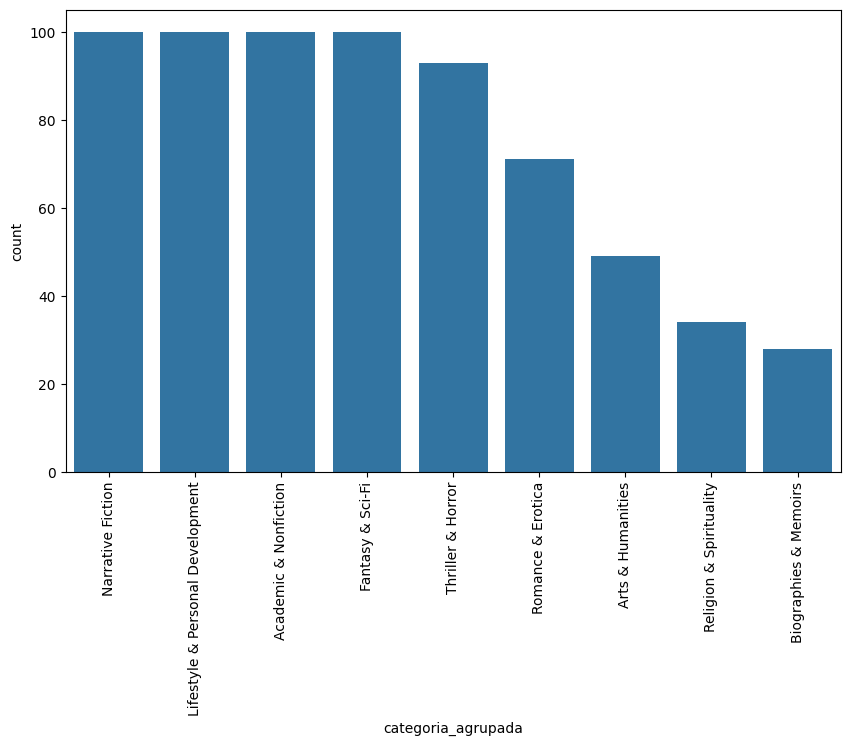

In [ ]:
df_category_counts = pd.DataFrame(df["categoria_agrupada"].value_counts())
df_category_counts = df_category_counts.sort_values(by = "count", ascending=False)
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(df_category_counts,x=df_category_counts.index,y="count")

In [ ]:
X = df.drop(columns=["categoria_agrupada"])
y = df["categoria_agrupada"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

## Regresión Logística

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.17      0.20      0.18        20
               Arts & Humanities       0.00      0.00      0.00        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.19      0.15      0.17        20
Lifestyle & Personal Development       0.32      0.55      0.41        20
               Narrative Fiction       0.32      0.45      0.38        20
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.15      0.14      0.15        14
               Thriller & Horror       0.47      0.50      0.49        18

                        accuracy                           0.28       135
                       macro avg       0.18      0.22      0.20       135
                    weighted avg       0.23      0.28      0.25       135



## Random Forest Classifier

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(n_estimators=100, max_depth = 7, random_state=42))
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.24      0.25      0.24        20
               Arts & Humanities       0.67      0.20      0.31        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.24      0.30      0.27        20
Lifestyle & Personal Development       0.27      0.30      0.29        20
               Narrative Fiction       0.25      0.45      0.32        20
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.14      0.07      0.10        14
               Thriller & Horror       0.38      0.44      0.41        18

                        accuracy                           0.27       135
                       macro avg       0.24      0.22      0.21       135
                    weighted avg       0.26      0.27      0.25       135



## SVC

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", SVC())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier', SVC())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.22      0.25      0.23        20
               Arts & Humanities       0.00      0.00      0.00        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.32      0.50      0.39        20
Lifestyle & Personal Development       0.29      0.30      0.29        20
               Narrative Fiction       0.30      0.50      0.38        20
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.14      0.14      0.14        14
               Thriller & Horror       0.54      0.39      0.45        18

                        accuracy                           0.30       135
                       macro avg       0.20      0.23      0.21       135
                    weighted avg       0.25      0.30      0.27       135



## KNeighbors Classifier

In [ ]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier())
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['availability', 'description_length', 'price'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['rating', 'sentiment_label'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

           Academic & Nonfiction       0.28      0.45      0.35        20
               Arts & Humanities       0.29      0.20      0.24        10
           Biographies & Memoirs       0.00      0.00      0.00         6
                Fantasy & Sci-Fi       0.18      0.20      0.19        20
Lifestyle & Personal Development       0.21      0.20      0.21        20
               Narrative Fiction       0.40      0.40      0.40        20
         Religion & Spirituality       0.00      0.00      0.00         7
               Romance & Erotica       0.22      0.14      0.17        14
               Thriller & Horror       0.33      0.33      0.33        18

                        accuracy                           0.26       135
                       macro avg       0.21      0.21      0.21       135
                    weighted avg       0.25      0.26      0.25       135



De los modelos de clasificación, después de nivelar más el número de registros por categoría, el mejor fue la máquina de soporte vectorial. Fue aquel con accuracy más alto y con métricas de precision y recall balanceados.

Aún así el modelo no es bueno.

# Conclusiones

## Regresión

El mejor modelo es Lasso, a pesar de que no hay relación lineal entre variables. Es el modelo con menor RMSE (13.78) y la mejor R^2 (-0.0057). Cabe mencionar que Lasso le da peso únicamente a description_length y es un valor que puede considerarse cero (0.04). En sí es el mejor modelo porque prácticamente solo considera el intercepto (35.28), el cual es un valor cercano al promedio (35.07). Esto nos dice que es mejor que demos como estimación el promedio.

## Clasificación

El mejor modelo se obtiene después de reducir el número de títulos para las categorías abundantes. El mejor modelo es la máquina de soporte vectorial (SVM), ya que obtuvo el mejor accuraccy (0.30) y mantiene un balance en la precision y recall de las categorias. Sin embargo, es importante señalar que eso no significa que el modelo sea bueno.


## Desempeño y mejoras

La razón del desempeño de los modelos se debe a los datos que se tienen en el dataset. Se observó en el EDA que las características no tenían suficiente fuerza o no eran un fuerte factor para determinar precios y categorías.
Datos que podrían ser de interés sería el tamaño del libro, número de páginas, autor, número de reseñas, pasta blanda/dura, densidad de página, tipo de libro, fecha_de_lanzamiento (antigüedad).

El rango del precio es estrecho, lo cual hace que el promedio sea un buen estimador. Porcentualmente, podrá significar mucho, pero en términos de la cotidianidad del consumidor el precio no le afectará demasiado.